In [123]:
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np

%matplotlib inline

In [124]:
load_dotenv()

True

In [125]:
current_crypto_data = {
    "crypto": [10, 5]
}
tickers = ["SOL", "ETH"]
df_crypto_data = pd.DataFrame(current_crypto_data, index=tickers)
df_crypto_data.head()

my_sol = 10
my_eth = 5

In [126]:
sol_url = "https://api.alternative.me/v2/ticker/Solana/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [127]:
sol_response_data = requests.get(sol_url)
solprice=sol_response_data.json()["data"]["11733"]["quotes"]["USD"]["price"]
solprice

20.04

In [128]:
eth_response_data = requests.get(eth_url)
ethprice=eth_response_data.json()["data"]["1027"]["quotes"]["USD"]["price"]
ethprice

1837.28

In [130]:
csv_path = ("../Group Project (self work)/solana_2022-04-07_2023-04-07.csv")

In [131]:
solana_df = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
solana_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2023-04-07,21.115700,21.115700,20.490900,21.074700,514236763.8,8019112515
2023-04-06,21.308900,21.308900,20.656500,21.092300,661240466.4,8083131223
2023-04-05,21.274400,21.429600,20.868200,21.294900,764765480.9,8181148724
2023-04-04,20.714291,21.359900,20.368200,21.263800,949884930.7,8062493862
2023-04-03,20.969700,21.161211,20.124418,20.689109,753052956.5,7917618884


In [133]:
solana_df.dropna(inplace=True)
solana_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2023-04-07,21.115700,21.115700,20.490900,21.074700,5.142368e+08,8019112515
2023-04-06,21.308900,21.308900,20.656500,21.092300,6.612405e+08,8083131223
2023-04-05,21.274400,21.429600,20.868200,21.294900,7.647655e+08,8181148724
2023-04-04,20.714291,21.359900,20.368200,21.263800,9.498849e+08,8062493862
2023-04-03,20.969700,21.161211,20.124418,20.689109,7.530530e+08,7917618884
...,...,...,...,...,...,...
2022-04-11,111.070100,111.751200,98.999100,99.657668,2.834260e+09,34734453378
2022-04-10,112.989397,112.989397,112.989397,112.989397,1.873845e+09,37021471252
2022-04-09,109.929800,113.130907,108.726135,113.130907,2.951543e+09,36210898016


In [134]:
solana_df = solana_df.rename(columns={
    "Close": "SOL Close"
})

solana_df.head()

,Open,High,Low,SOL Close,Volume,Market Cap
Date,,,,,,
2023-04-07,21.115700,21.115700,20.490900,21.074700,514236763.8,8019112515
2023-04-06,21.308900,21.308900,20.656500,21.092300,661240466.4,8083131223
2023-04-05,21.274400,21.429600,20.868200,21.294900,764765480.9,8181148724
2023-04-04,20.714291,21.359900,20.368200,21.263800,949884930.7,8062493862
2023-04-03,20.969700,21.161211,20.124418,20.689109,753052956.5,7917618884


In [135]:
csv_path = ("../Group Project (self work)/ethereum_data1.csv")

In [136]:
ethereum_df = pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
ethereum_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2023-04-07,1868.230500,1876.7467,1843.310916,1861.181700,1.889246e+10,2.238295e+11
2023-04-06,1904.798600,1904.7986,1854.507500,1867.531400,2.363320e+10,2.258961e+11
2023-04-05,1869.248500,1924.3323,1866.754800,1905.910900,2.985338e+10,2.292801e+11
2023-04-04,1809.424169,1878.9072,1803.206766,1868.088900,4.680813e+10,2.218528e+11
2023-04-03,1794.062500,1832.5562,1764.688700,1807.962922,2.158686e+10,2.163377e+11


In [137]:
ethereum_df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [138]:
ethereum_df.dropna(inplace=True)
ethereum_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2023-04-07,1868.230500,1876.746700,1843.310916,1861.181700,1.889246e+10,2.238295e+11
2023-04-06,1904.798600,1904.798600,1854.507500,1867.531400,2.363320e+10,2.258961e+11
2023-04-05,1869.248500,1924.332300,1866.754800,1905.910900,2.985338e+10,2.292801e+11
2023-04-04,1809.424169,1878.907200,1803.206766,1868.088900,4.680813e+10,2.218528e+11
2023-04-03,1794.062500,1832.556200,1764.688700,1807.962922,2.158686e+10,2.163377e+11
...,...,...,...,...,...,...
2022-04-11,3206.793100,3216.940800,2966.003600,2986.513994,2.963645e+10,3.727490e+11
2022-04-10,3268.050935,3268.050935,3268.050935,3268.050935,1.764877e+10,3.931881e+11
2022-04-09,3197.992100,3266.452679,3190.763300,3266.452679,2.532125e+10,3.877849e+11


In [139]:
ethereum_df = ethereum_df.rename(columns={
    "Close": "Eth Close"
})

ethereum_df.head()

,Open,High,Low,Eth Close,Volume,Market Cap
Date,,,,,,
2023-04-07,1868.230500,1876.7467,1843.310916,1861.181700,1.889246e+10,2.238295e+11
2023-04-06,1904.798600,1904.7986,1854.507500,1867.531400,2.363320e+10,2.258961e+11
2023-04-05,1869.248500,1924.3323,1866.754800,1905.910900,2.985338e+10,2.292801e+11
2023-04-04,1809.424169,1878.9072,1803.206766,1868.088900,4.680813e+10,2.218528e+11
2023-04-03,1794.062500,1832.5562,1764.688700,1807.962922,2.158686e+10,2.163377e+11


In [140]:
combined_data = pd.concat([solana_df,ethereum_df], axis="columns", join="inner")
combined_data
combined_data.sort_index(inplace=True)
combined_data.head()

,Open,High,Low,SOL Close,Volume,Market Cap,Open,High,Low,Eth Close,Volume,Market Cap
Date,,,,,,,,,,,,
2022-04-07,113.056986,119.859500,111.809927,118.914849,4.636534e+09,37819207023,3173.681729,3268.738900,3154.078973,3238.589493,3.651199e+10,3.871879e+11
2022-04-08,118.718457,122.051778,108.605400,109.755500,3.572973e+09,38186601588,3233.109855,3310.757896,3181.833100,3197.027500,2.861533e+10,3.920403e+11
2022-04-09,109.929800,113.130907,108.726135,113.130907,2.951543e+09,36210898016,3197.992100,3266.452679,3190.763300,3266.452679,2.532125e+10,3.877849e+11
2022-04-10,112.989397,112.989397,112.989397,112.989397,1.873845e+09,37021471252,3268.050935,3268.050935,3268.050935,3268.050935,1.764877e+10,3.931881e+11
2022-04-11,111.070100,111.751200,98.999100,99.657668,2.834260e+09,34734453378,3206.793100,3216.940800,2966.003600,2986.513994,2.963645e+10,3.727490e+11


In [141]:
combined_data = combined_data.drop(columns=["Open", "High", "Low", "Volume", "Market Cap"])
combined_data.head()

,SOL Close,Eth Close
Date,,
2022-04-07,118.914849,3238.589493
2022-04-08,109.755500,3197.027500
2022-04-09,113.130907,3266.452679
2022-04-10,112.989397,3268.050935
2022-04-11,99.657668,2986.513994


In [142]:
combined_data = combined_data.rename(columns={
    "SOL Close": "Solana Closing Price",
    "Eth Close": "Ethereum Closing Price"
})
combined_data.head()

,Solana Closing Price,Ethereum Closing Price
Date,,
2022-04-07,118.914849,3238.589493
2022-04-08,109.755500,3197.027500
2022-04-09,113.130907,3266.452679
2022-04-10,112.989397,3268.050935
2022-04-11,99.657668,2986.513994


<AxesSubplot:xlabel='Date'>

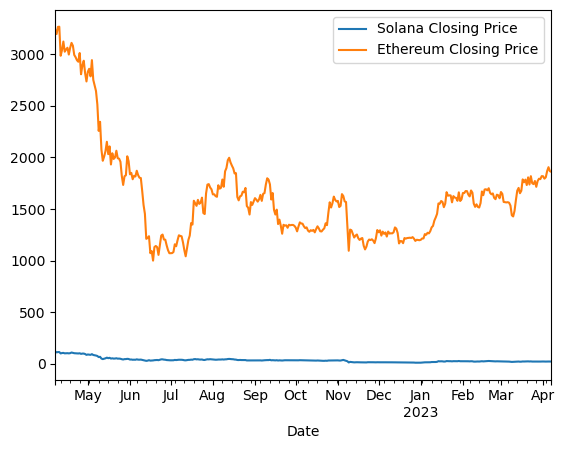

In [143]:
combined_data.plot()

<AxesSubplot:title={'center':'Solana Risk'}>

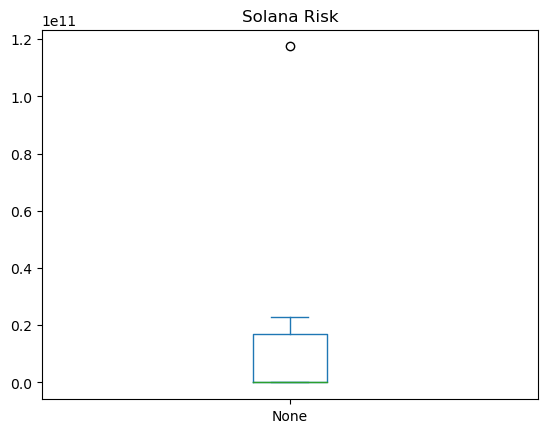

In [144]:
sol_volatility = solana_df.std() * np.sqrt(252)
sol_volatility.sort_values(inplace=True)
sol_volatility.plot.box(title='Solana Risk')

<AxesSubplot:title={'center':'Ethereum Risk'}>

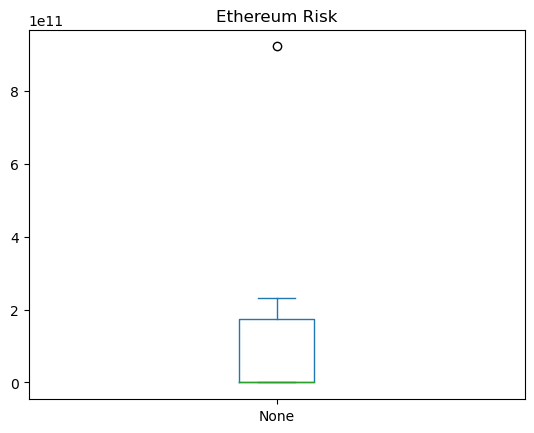

In [145]:
eth_volatility = ethereum_df.std() * np.sqrt(252)
eth_volatility.sort_values(inplace=True)
eth_volatility.plot.box(title='Ethereum Risk')

In [146]:
portfolio_std = combined_data.std()
portfolio_std

Solana Closing Price       22.503555
Ethereum Closing Price    483.424818
dtype: float64

<AxesSubplot:>

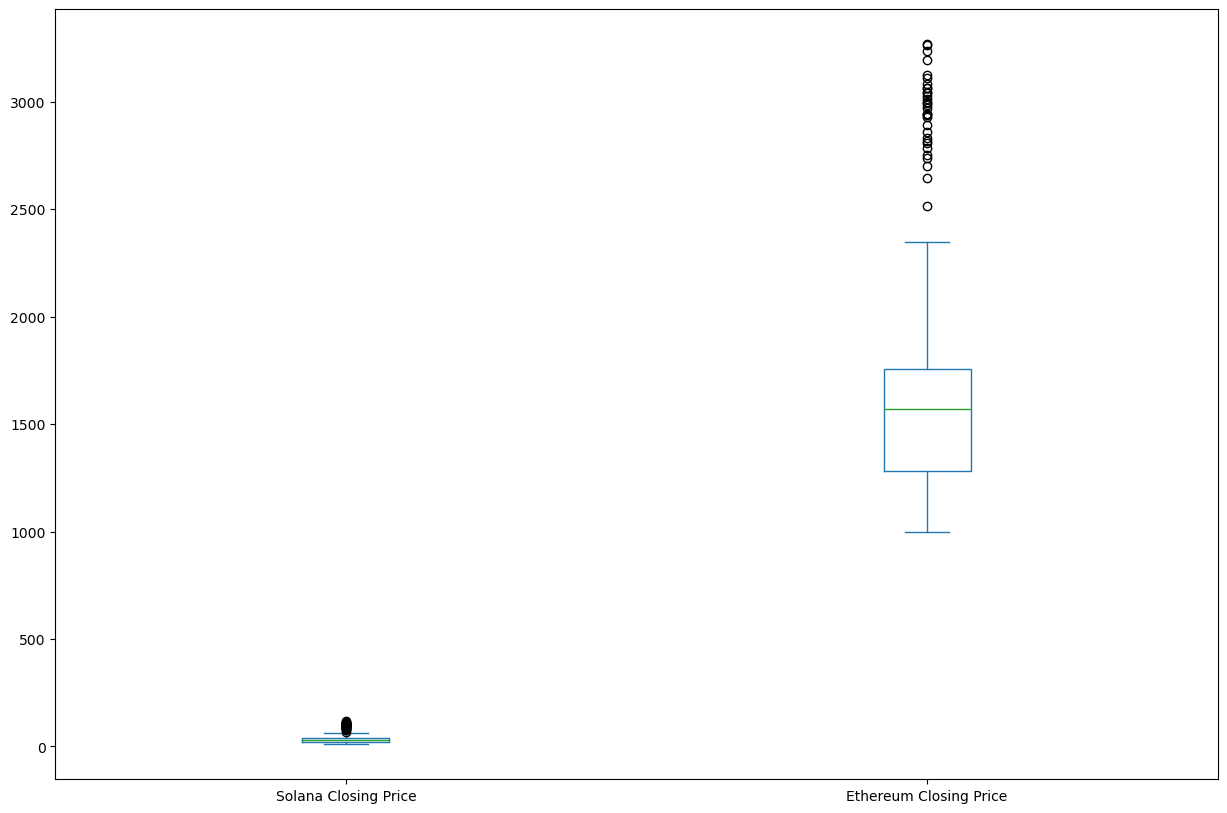

In [147]:
combined_data.plot.box(figsize = (15, 10))

In [148]:
crypto_std = combined_data.std()
crypto_std

Solana Closing Price       22.503555
Ethereum Closing Price    483.424818
dtype: float64

In [149]:
crypto_std * np.sqrt(252)

Solana Closing Price       357.232855
Ethereum Closing Price    7674.131074
dtype: float64

In [158]:
rolling_crypto = combined_data.rolling(window=60).std()
rolling_crypto.tail()

,Solana Closing Price,Ethereum Closing Price
Date,,
2023-04-03,1.843732,99.563435
2023-04-04,1.806454,103.120131
2023-04-05,1.772610,107.778343
2023-04-06,1.757653,110.774733
2023-04-07,1.753405,113.270785


In [154]:
crypto_corr = combined_data.corr()
crypto_corr.style.background_gradient(cmap="summer")

,Solana Closing Price,Ethereum Closing Price
Solana Closing Price,1.000000,0.881721
Ethereum Closing Price,0.881721,1.000000


In [156]:
sharpe=(combined_data.mean()*252) / (rolling_crypto * np.sqrt(252)) 
sharpe.tail()

,Solana Closing Price,Ethereum Closing Price
Date,,
2023-04-03,299.517235,260.834148
2023-04-04,305.698171,251.837771
2023-04-05,311.534797,240.953266
2023-04-06,314.185831,234.435625
2023-04-07,314.947014,229.269567


<AxesSubplot:xlabel='Date'>

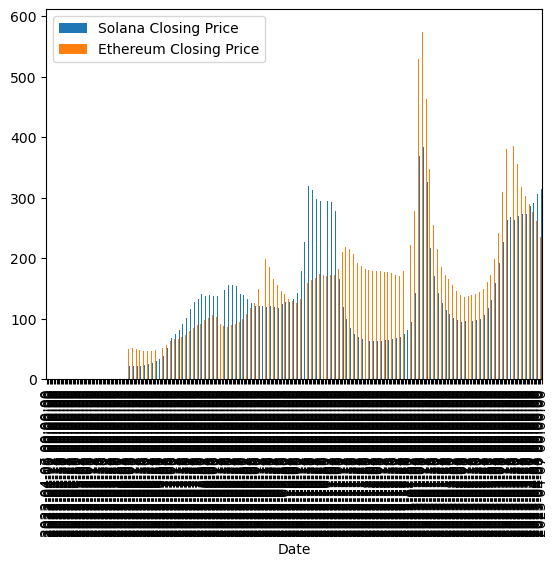

In [159]:
sharpe.plot.bar()